In [11]:
#pip install imageio

In [12]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# library for pickle object
import pickle
# helper to load data from PNG image files
import imageio
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [13]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

    # save neural network weights 
    def save(self):
        numpy.save('saved_wih.npy', self.wih)
        numpy.save('saved_who.npy', self.who)

        pass

    # load neural network weights 
    def load(self):
        self.wih = numpy.load('saved_wih.npy')
        self.who = numpy.load('saved_who.npy')
        
        pass

In [14]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [15]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [16]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [17]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [30]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [31]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9723


loading ...
min =  0.01
max =  0.93011767
[[6.93151889e-04]
 [2.12544570e-03]
 [1.87319699e-01]
 [7.00025748e-04]
 [8.42438401e-01]
 [2.62272630e-02]
 [8.27526093e-03]
 [1.52167980e-02]
 [3.90283922e-04]
 [7.66075181e-04]]
network says  4


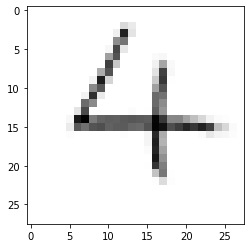

In [28]:
# test the neural network with our own images

# load image data from png files into an array
print ("loading ...")
img_array = imageio.imread('images/2828_my_own_4.png', as_gray=True)
    
# reshape from 28x28 to list of 784 values, invert values
img_data  = 255.0 - img_array.reshape(784)
    
# then scale data to range from 0.01 to 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", numpy.min(img_data))
print("max = ", numpy.max(img_data))

# plot image
matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

# query the network
outputs = n.query(img_data)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
n.save()

min =  0.01
max =  0.9611764705882353


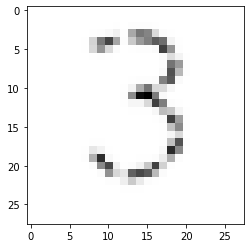

In [34]:
testData = numpy.array(
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,255,252,250.99999999999997,250.99999999999997,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,250.99999999999997,243.99999999999997,226,250.99999999999997,147,106,117.99999999999999,196,248.99999999999997,253.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,188,107,62,144,250,177,135,113.99999999999999,80,98,232,253.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,191,131,194,247,255,253,252,250.99999999999997,245,60,131,250.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,252,253,255,255,255,255,255,255,248,199,232,253.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,250.99999999999997,103,136,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,246,72,160,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,252,250.99999999999997,250,114.99999999999999,77.99999999999999,245,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,232,150,103,191,194.99999999999997,240,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,250.99999999999997,124,21,10,110,246,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,235.99999999999997,237,194,58.99999999999999,112,248.99999999999997,253.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,253.99999999999997,253,238,163,173,233,253.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,247,58.99999999999999,139,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,167,121.99999999999999,250.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,238.99999999999997,194,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,253.99999999999997,255,255,255,255,255,255,255,253,168,72,250,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,212,229.99999999999997,253.99999999999997,255,255,255,255,255,255,243.99999999999997,45,121,250.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,252,153,47,240.99999999999997,253.99999999999997,255,255,253.99999999999997,253,248.99999999999997,221,153,248.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,248.99999999999997,121.99999999999999,65,222.99999999999997,253,250,229.99999999999997,174,58.99999999999999,187,250.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,248,127.99999999999999,191,211,86,65,79,161,248,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,252,252,224,178,215.99999999999997,248.99999999999997,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253.99999999999997,253,253.99999999999997,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]
)

testData  = 255.0 - testData
# then scale data to range from 0.01 to 1.0
testData = (testData / 255.0 * 0.99) + 0.01
print("min = ", numpy.min(testData))
print("max = ", numpy.max(testData))

# plot image
matplotlib.pyplot.imshow(testData.reshape(28,28), cmap='Greys', interpolation='None')

In [35]:
outputs = n.query(testData)
print(outputs)

label = numpy.argmax(outputs)
print("network says ", label)

[[5.38122509e-04]
 [9.38834679e-03]
 [1.42473080e-03]
 [9.52306146e-01]
 [9.64722288e-04]
 [6.49230585e-02]
 [3.20554825e-04]
 [3.63958555e-03]
 [2.35913052e-03]
 [1.69846089e-03]]
network says  3
